In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load dataset
data = pd.read_csv('/content/Plant_1_Generation_Data.csv.zip')

In [5]:

# Convert 'DATE_TIME' column to datetime format
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], format='%d-%m-%Y %H:%M')

In [6]:

# Extract useful features from 'DATE_TIME'
data['Hour'] = data['DATE_TIME'].dt.hour
data['Day'] = data['DATE_TIME'].dt.day
data['Month'] = data['DATE_TIME'].dt.month

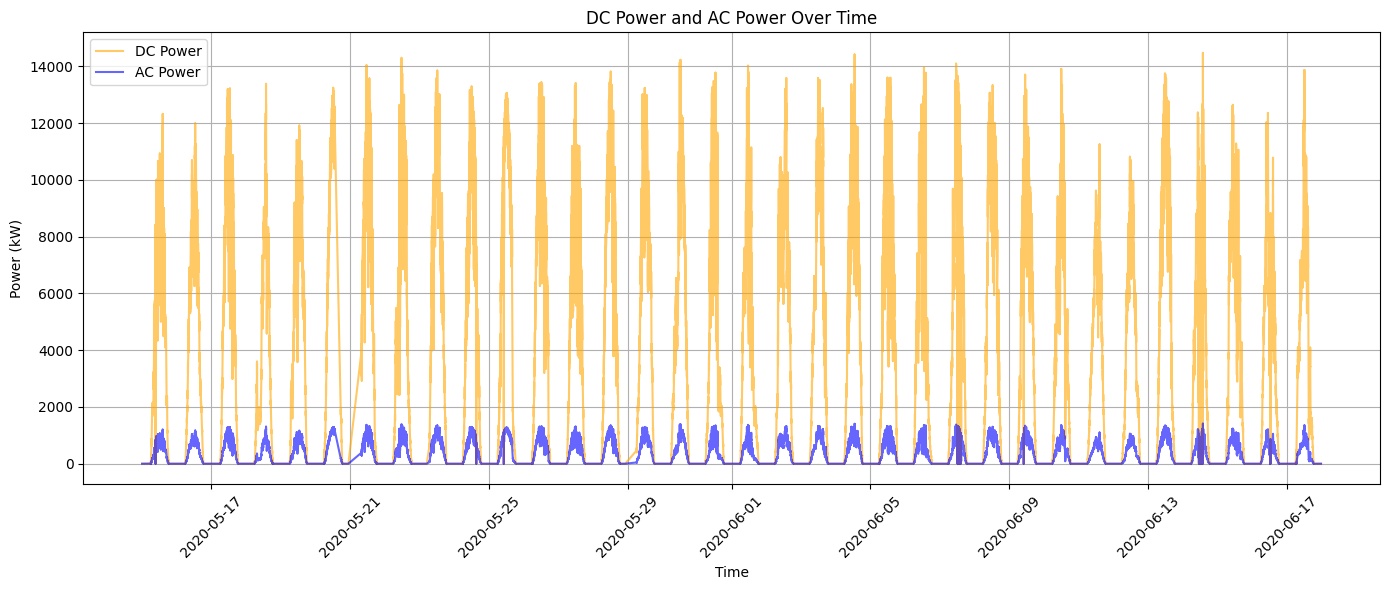

In [7]:
# Visualize DC Power and AC Power over time
plt.figure(figsize=(14, 6))
plt.plot(data['DATE_TIME'], data['DC_POWER'], label='DC Power', color='orange', alpha=0.6)
plt.plot(data['DATE_TIME'], data['AC_POWER'], label='AC Power', color='blue', alpha=0.6)
plt.title('DC Power and AC Power Over Time')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:

# Select features and target
X = data[['DC_POWER', 'Hour', 'Day', 'Month']]
y = data['AC_POWER']

In [9]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:


# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [13]:

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 163906.6250 - val_loss: 78.2513
Epoch 2/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 16.7049 - val_loss: 2.1245
Epoch 3/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6744 - val_loss: 1.2268
Epoch 4/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0727 - val_loss: 1.1108
Epoch 5/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9143 - val_loss: 0.9047
Epoch 6/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9133 - val_loss: 0.8679
Epoch 7/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9652 - val_loss: 0.9240
Epoch 8/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0363 - val_loss: 1.4879
Epoch 9/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0295 - val_loss: 1.2995
Epoch 10/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0553 - val_loss: 1.0992
Epoch 11/50
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0254 - val_loss: 0.9320
Epoch 12/50
1376/1376 ━

In [14]:

# Evaluate the model on test data
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss (MSE): {loss}')

430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4143
Test Loss (MSE): 1.5145727396011353


In [15]:
# Make predictions
y_pred = model.predict(X_test_scaled)

430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [16]:

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1.514572758481974
R-squared (R2): 0.9999901991898393


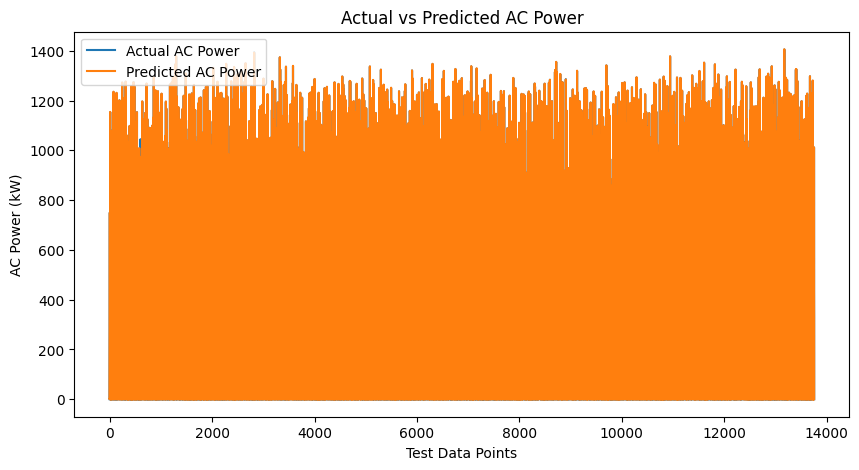

In [17]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual AC Power')
plt.plot(y_pred, label='Predicted AC Power')
plt.title('Actual vs Predicted AC Power')
plt.xlabel('Test Data Points')
plt.ylabel('AC Power (kW)')
plt.legend()
plt.show()

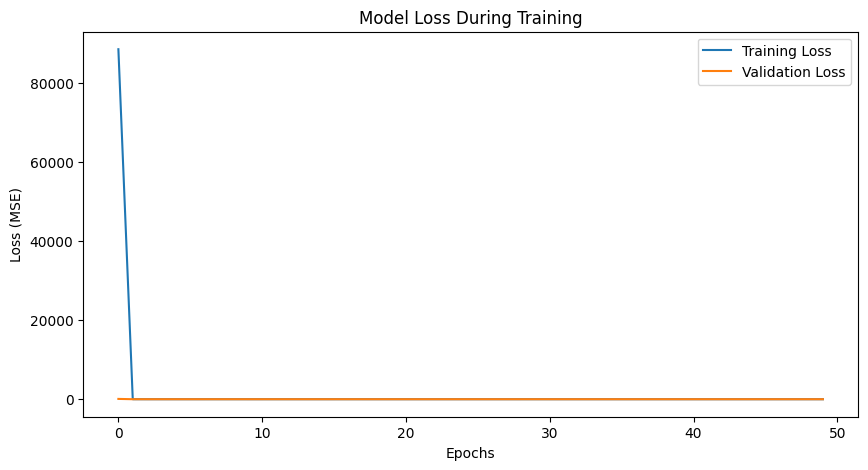

In [18]:
# Plot training loss history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [19]:

# Save the model and scaler for future use
model.save('power_prediction_model.h5')

In [20]:


# Saving scaler (important to normalize future data the same way)
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)

['scaler.save']